In [2]:
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from Bio import SeqIO
pypdir = os.path.abspath("../data/Pseudo")
genomedb = os.path.abspath("../data/genomedb")
strains = [line.rstrip() for line in open(os.path.join(pypdir,"prop_strainlist.txt"),'r')]

%matplotlib inline

In [3]:
matrixfile = open(os.path.join(pypdir,"homolog_matrix.txt"),'r')
header = matrixfile.readline().rstrip().split("\t")
indices = [header.index(s) for s in strains]

lines = []
for line in matrixfile:
    vals = line.rstrip().split("\t")
    # convert input data into boolean presence/absence
    lines.append([int(bool(int(vals[i]))) for i in indices])
a = np.stack(lines)
a.shape


(24066, 898)

In [4]:
seqcount = {}
for s in strains:
    count = 0
    for seq in SeqIO.parse(open(os.path.join(genomedb,"pep",s+".pep.fa"),'r'),'fasta'):
        count += 1
    seqcount[s] = count

In [13]:
l = a.shape[1]
x = []
y = []
for i in range(1,l):
    y.append(float(np.sum(a[:,i]))/float(seqcount[strains[i]]))
    x.append(i)
y = sorted(y)

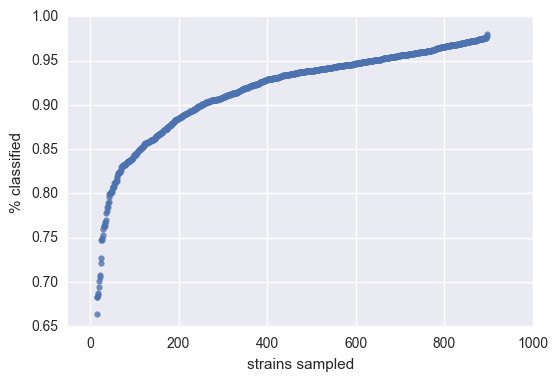

In [14]:
x, y = pd.Series(x, name="strains sampled"), pd.Series(sorted(y), name="% classified")

plt.xlim([-50,1000])
plt.ylim([0.65,1])
ax = sns.regplot(x=x,y=y,fit_reg=False)
plt.savefig(os.path.join(pypdir,"ClassificationRate.png"))